<a href="https://colab.research.google.com/github/rajjjxd/ML-Tutorials/blob/main/Bagging(classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()


In [ ]:
df['Species'] = encoder.fit_transform(df['Species'])


In [ ]:
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]


In [ ]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [ ]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


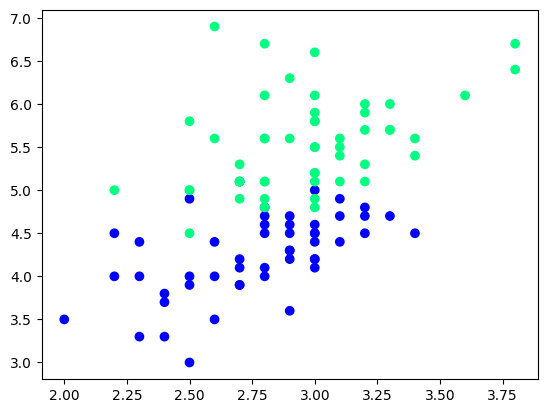

In [ ]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [ ]:
#########
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
90,2.6,4.4,1
56,3.3,4.7,1
89,2.5,4.0,1
83,2.7,5.1,1
104,3.0,5.8,2
58,2.9,4.6,1
102,3.0,5.9,2
63,2.9,4.7,1
105,3.0,6.6,2
51,3.2,4.5,1


In [ ]:
# Taking only 10 rows for training
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
df_train


,SepalWidthCm,PetalLengthCm,Species
71,2.8,4.0,1
98,2.5,3.0,1
139,3.1,5.4,2
121,2.8,4.9,2
149,3.0,5.1,2
53,2.3,4.0,1
70,3.2,4.8,1
113,2.5,5.0,2
55,2.8,4.5,1
82,2.7,3.9,1


In [ ]:
df_val


,SepalWidthCm,PetalLengthCm,Species
80,2.4,3.8,1
94,2.7,4.2,1
73,2.8,4.7,1
108,2.5,5.8,2
83,2.7,5.1,1


In [ ]:
df_test


,SepalWidthCm,PetalLengthCm,Species
136,3.4,5.6,2
126,2.8,4.8,2
115,3.2,5.3,2
87,2.3,4.4,1
91,3.0,4.6,1


In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [ ]:
y_test


array([1, 1, 1, 2, 1])

BAGGING

In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
53,2.3,4.0,1
139,3.1,5.4,2
121,2.8,4.9,2
121,2.8,4.9,2
82,2.7,3.9,1
113,2.5,5.0,2
55,2.8,4.5,1
98,2.5,3.0,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
def evaluate(model, X, y):

  model.fit(X,y)
  y_pred = model.predict(X)
  acc = accuracy_score(y, y_pred)
  print(f"Accuracy: {acc}")

In [ ]:
dt_bag1 = DecisionTreeClassifier()


In [ ]:
evaluate(dt_bag1,X,y)

Accuracy: 1.0


In [ ]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
139,3.1,5.4,2
121,2.8,4.9,2
149,3.0,5.1,2
82,2.7,3.9,1
113,2.5,5.0,2
53,2.3,4.0,1
139,3.1,5.4,2
55,2.8,4.5,1


In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

Accuracy: 1.0
